In [12]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [35]:
# load
df = pd.read_csv('learning.csv')
print('Training data shape: ', df.shape)
#df.head()
df.describe()

('Training data shape: ', (18340, 7))


,changedFiles,additions,deletions,duration,pullRequestReviews,reviewRequests
count,18340.000000,18340.000000,18340.000000,1.834000e+04,18340.000000,18340.000000
mean,9.799128,482.536205,278.157797,3.083619e+05,1.071974,0.326772
std,66.920217,10595.377424,6553.998420,1.136347e+06,3.429161,0.702432
min,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.099750e+03,0.000000,0.000000
50%,2.000000,16.000000,5.000000,4.721450e+04,0.000000,0.000000
75%,5.000000,80.000000,23.000000,2.458115e+05,1.000000,0.000000
max,2807.000000,860038.000000,550313.000000,3.604603e+07,124.000000,7.000000


In [10]:
# Extract the EXT_SOURCE variables and show correlations
ext_data_corrs = df.corr()
ext_data_corrs

,changedFiles,additions,deletions,duration,pullRequestReviews,reviewRequests
changedFiles,1.000000,0.374927,0.238807,0.002681,0.032538,0.015575
additions,0.374927,1.000000,0.047370,0.018571,0.040747,0.012206
deletions,0.238807,0.047370,1.000000,0.004102,0.014648,-0.001860
duration,0.002681,0.018571,0.004102,1.000000,0.047348,-0.021880
pullRequestReviews,0.032538,0.040747,0.014648,0.047348,1.000000,0.052829
reviewRequests,0.015575,0.012206,-0.001860,-0.021880,0.052829,1.000000


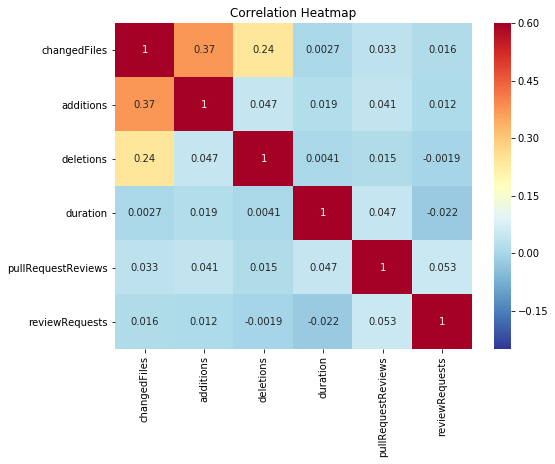

In [4]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [70]:
#file input
learning = pd.read_csv('learning.csv')

#features
feature_cols = ['changedFiles','additions','deletions','pullRequestReviews','reviewRequests']
#feature_cols = ['deletions','pullRequestReviews']

#feature harness
X = learning.loc[:, feature_cols]

#target harness
Y = learning.duration

#model fit
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
# copy row from learning
Xnew = [[55,2428,292,0,1]]
# prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[55, 2428, 292, 0, 1], Predicted=263478.294487


In [73]:
### fake new data
Xnew,_ = make_regression(n_samples=3, n_features=5, noise=0.1, random_state=1)
#predict
ynew = model.predict(Xnew)
#print inputs with predictions
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-1.07296862 -0.52817175 -0.61175641  1.62434536  0.86540763], Predicted=295808.526299
X=[-0.38405435 -0.3224172  -2.06014071  1.46210794  1.13376944], Predicted=282494.555763
X=[ 0.3190391  -0.7612069   1.74481176 -2.3015387  -0.24937038], Predicted=277437.789422


In [74]:
#https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
# Cross Validation Regression MAE
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)") % (results.mean(), results.std())

# Cross Validation Regression MSE
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

# Cross Validation Regression R^2
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)") % (results.mean(), results.std())

MAE: -400306.937 (30287.522)
MSE: -1288268437736.512 (528178334937.388)
R^2: 0.001 (0.005)
